In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# read dataframe
nb_seeds = 10
results_dir = "/storage/store2/work/aheurteb/mvicad/tbme/data/"
save_name = f"DataFrame_with_{nb_seeds}_seeds_wrt_different_filters_combinations"
save_path = results_dir + save_name
df = pd.read_csv(save_path)

In [9]:
df

,Amari LBFGSB,Dilations error LBFGSB,Shifts error LBFGSB,Time LBFGSB,Amari MVICAD,Time MVICAD,Amari MVICAD ext,Time MVICAD ext,Amari permica,random_state,filter_length_squarenorm_f,use_envelop_term,number_of_filters_envelop,filter_length_envelop
0,0.000239,0.016791,0.006787,47.270386,0.005078,0.457674,0.001466,0.676550,0.028755,0,1,True,1,2
1,0.000089,0.008885,0.009041,45.844416,0.010534,0.422948,0.001591,0.657815,0.031155,1,1,True,1,2
2,0.000143,0.009121,0.003783,49.146829,0.001413,0.537341,0.001132,0.701259,0.010443,2,1,True,1,2
3,0.000088,0.011045,0.004410,48.950658,0.010252,0.469340,0.003403,0.625279,0.015611,3,1,True,1,2
4,0.000059,0.015897,0.004034,51.213391,0.005418,0.450509,0.001969,0.635829,0.011055,4,1,True,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,0.000159,0.017485,0.014523,46.125293,0.002123,0.670494,0.001682,0.932254,0.023370,5,15,False,0,0
1116,0.000137,0.017773,0.013572,52.497621,0.002544,0.789042,0.000642,0.995808,0.018098,6,15,False,0,0
1117,0.000115,0.020639,0.021973,51.728595,0.005103,0.569287,0.001430,0.666200,0.018481,7,15,False,0,0
1118,0.000188,0.013347,0.015997,50.967790,0.012542,0.500995,0.001493,0.687445,0.099290,8,15,False,0,0


In [10]:
# average among random states
nb_random_states = len(np.unique(df["random_state"]))
nb_random_states

10

In [11]:
# check if DataFrame can be evenly divided into batches of size nb_random_states
if len(df) % nb_random_states != 0:
    raise ValueError("The number of rows in the DataFrame should be a multiple of the \
        number of random states.")

# split the DataFrame into batches and compute the median for each batch
batches = [df[i:i + nb_random_states] for i in range(0, len(df), nb_random_states)]
batch_means = [batch.median() for batch in batches]

# combine the results into a single DataFrame
df_median = pd.DataFrame(batch_means).reset_index(drop=True)

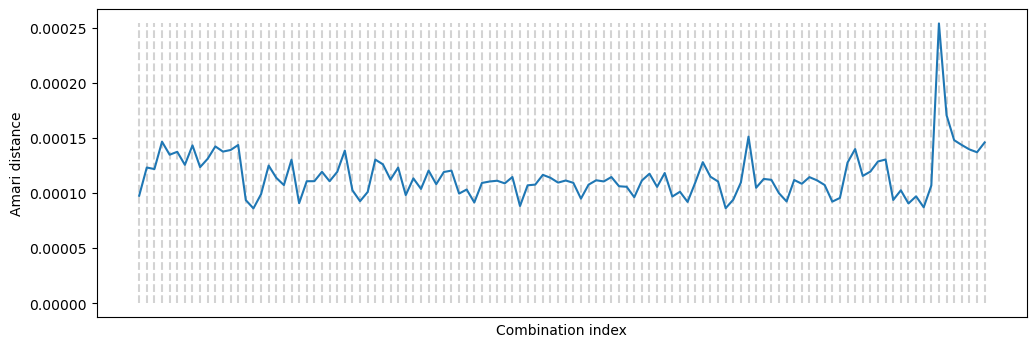

In [12]:
# plot
plt.figure(figsize=(12, 4))
plt.plot(np.arange(len(df_median)), df_median["Amari LBFGSB"])
for i in range(len(df_median)):
    plt.vlines(x=i, ymin=0, ymax=np.max(df_median["Amari LBFGSB"]), linestyles="--", colors="lightgrey")
plt.xticks([])
plt.xlabel("Combination index")
plt.ylabel("Amari distance")
plt.show()

In [27]:
nb_combs = 15
sorted_indices = np.argsort(df_median["Amari LBFGSB"].values)[::-1]
best_combs = sorted_indices[-nb_combs:][::-1]
worst_combs = sorted_indices[:nb_combs]
print(f"Best combinations indexes: {best_combs}")
print(f"Worst combinations indexes: {worst_combs}")

Best combinations indexes: [ 15  77 103  50 101  21  44  72  91  85  29  14  99  78  58]
Worst combinations indexes: [105 106  80 107   3 111  13 108   7  10  94 109  12  27  11]


In [28]:
for i, comb in enumerate(best_combs):
    print(f"############################ Best combination {i} ############################")
    row = df.iloc[comb*nb_random_states]
    print(row.loc[["filter_length_squarenorm_f", "use_envelop_term", "number_of_filters_envelop", "filter_length_envelop"]])

############################ Best combination 0 ############################
filter_length_squarenorm_f       2
use_envelop_term              True
number_of_filters_envelop        1
filter_length_envelop            3
Name: 150, dtype: object
############################ Best combination 1 ############################
filter_length_squarenorm_f      10
use_envelop_term              True
number_of_filters_envelop        2
filter_length_envelop            2
Name: 770, dtype: object
############################ Best combination 2 ############################
filter_length_squarenorm_f      10
use_envelop_term              True
number_of_filters_envelop        1
filter_length_envelop            1
Name: 1030, dtype: object
############################ Best combination 3 ############################
filter_length_squarenorm_f       5
use_envelop_term              True
number_of_filters_envelop        2
filter_length_envelop            3
Name: 500, dtype: object
############################ Be

In [21]:
for i, comb in enumerate(worst_combs):
    print(f"############################ Worst combination {i} ############################")
    row = df.iloc[comb*nb_random_states]
    print(row.loc[["filter_length_squarenorm_f", "use_envelop_term", "number_of_filters_envelop", "filter_length_envelop"]])

############################ Worst combination 0 ############################
filter_length_squarenorm_f        1
use_envelop_term              False
number_of_filters_envelop         0
filter_length_envelop             0
Name: 1050, dtype: object
############################ Worst combination 1 ############################
filter_length_squarenorm_f        2
use_envelop_term              False
number_of_filters_envelop         0
filter_length_envelop             0
Name: 1060, dtype: object
############################ Worst combination 2 ############################
filter_length_squarenorm_f      10
use_envelop_term              True
number_of_filters_envelop        2
filter_length_envelop           10
Name: 800, dtype: object
############################ Worst combination 3 ############################
filter_length_squarenorm_f        3
use_envelop_term              False
number_of_filters_envelop         0
filter_length_envelop             0
Name: 1070, dtype: object
#############

Potential conclusion with 2 seeds: not using a smoothing filter in the square norm term is bad. However, it is strange that peaks only appear for filter_length_envelop = 1 and 10; I should wait for data with more seeds.

Potential conclusion with 10 seeds: not using filters is bad; too much filters is bad too. There is no real best combination, apart from the fact that: the filter_length_squarenorm_f should be anything except 1; use_envelop_term should be True; number_of_filters_envelop can be 1 or 2; filter_length_envelop should be at most 5.